In [75]:
import xarray as xr
#import rioxarray as rxr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
### Plotting stuff 
plt.rc('figure', figsize=(12, 10))
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB_ex1='#8dd3c7'
CB_ex2='#bebada'
CB_ex3='#ffffb3'
CB_ex4='#fb8072'
CB_ex5='#fdb462'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB_ex1,CB_ex2,CB_ex3,CB_ex4,CB_ex5,CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 10})

In [77]:


def ProcessbyPAge(Data,Var,Time):
    out=pd.DataFrame({"Age"+str(Ages[0]):np.array(Data[Var][:,0]).flatten(),
              "Age"+str(Ages[1]):np.array(Data[Var][:,1]).flatten(),
              "Age"+str(Ages[2]):np.array(Data[Var][:,2]).flatten(),
              "Age"+str(Ages[3]):np.array(Data[Var][:,3]).flatten(),
              "Age"+str(Ages[4]):np.array(Data[Var][:,4]).flatten(),
              "Age"+ str(Ages[5]):np.array(Data[Var][:,5]).flatten(),
              "Age"+str(Ages[6]):np.array(Data[Var][:,6]).flatten()
              },index=Time)
    return(out)

def ProcessbyFuelClass(Data,Var,Time):
    out=pd.DataFrame({"FuelClass"+str(FuelClass[0]):np.array(Data[Var][:,0]).flatten(),
              "FuelClass"+str(FuelClass[1]):np.array(Data[Var][:,1]).flatten(),
              "FuelClass"+str(FuelClass[2]):np.array(Data[Var][:,2]).flatten(),
              "FuelClass"+str(FuelClass[3]):np.array(Data[Var][:,3]).flatten(),
              "FuelClass"+str(FuelClass[4]):np.array(Data[Var][:,4]).flatten(),
              "FuelClass"+str(FuelClass[5]):np.array(Data[Var][:,5]).flatten(),
              },index=Time)
    return(out)
def ProcesbyCanopyLay(Data,Var,Time):
    out=pd.DataFrame({"Understory"+str(Canopy[0]):np.array(Data[Var][:,0]).flatten(),
              "Canopy"+str(Canopy[1]):np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def ProcesbyPFT(Data,Var,Time,PFT):
    out=pd.DataFrame({PFT[0]:np.array(Data[Var][:,0]).flatten(),
              PFT[1]:np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def plotterage(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Age0.0'],label="Age 0.0")
    plt.plot(data['Age1.0'],label="Age 1.0")
    plt.plot(data['Age2.0'],label="Age 2.0")
    plt.plot(data['Age5.0'],label="Age 5.0")
    plt.plot(data['Age10.0'],label="Age 10.0")
    plt.plot(data['Age20.0'],label="Age 20.0")
    plt.plot(data['Age50.0'],label="Age 50.0")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
def plottercan(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Understory1'],label="Understory")
    plt.plot(data['Canopy2'],label="Overstory")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})

def plottercan(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Understory1'],label="Understory")
    plt.plot(data['Canopy2'],label="Overstory")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
    
def plotterpft(data,PFT,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data[PFT[0]],label=PFT[0])
    plt.plot(data[PFT[1]],label=PFT[1])
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1),prop={'size': 20})

In [78]:
data_path = "C:/Users/345578/Documents/GitHub/Transfer_HPC/EG_test.nc"

Fates_xr  = xr.open_dataset(data_path)  
### Set up labels 
test=Fates_xr.coords['time'].values
#print()
#Fates_xr=Fates_xr.isel(time=slice(0,np.int(len(test)/2)))

#Fates_xr=Fates_xr.isel(time=slice(500,600))
### Set up labels 
Ages=Fates_xr.coords['fates_levage'].values
Time=Fates_xr.indexes['time'].to_datetimeindex()
FuelClass=Fates_xr.indexes['fates_levfuel'].values  
Canopy=Fates_xr.indexes['fates_levcan'].values  
nscls_bins = len(Fates_xr.variables['fates_levscls'])
npfts = len(Fates_xr.variables['fates_levpft'])
nage_bins = len(Fates_xr.variables['fates_levage'])
print(Time)

DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', length=840, freq=None)


<ipython-input-78-1f6fad6174ef>:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  Time=Fates_xr.indexes['time'].to_datetimeindex()


In [79]:
list(Fates_xr.keys())

['fates_scmap_levscag',
 'fates_agmap_levscag',
 'fates_pftmap_levscpf',
 'fates_scmap_levscpf',
 'fates_pftmap_levcapf',
 'fates_camap_levcapf',
 'fates_canmap_levcnlf',
 'fates_lfmap_levcnlf',
 'fates_canmap_levcnlfpf',
 'fates_lfmap_levcnlfpf',
 'fates_pftmap_levcnlfpf',
 'fates_scmap_levscagpft',
 'fates_agmap_levscagpft',
 'fates_pftmap_levscagpft',
 'fates_pftmap_levagepft',
 'fates_agmap_levagepft',
 'fates_elmap_levelpft',
 'fates_pftmap_levelpft',
 'fates_elmap_levelcwd',
 'fates_cwdmap_levelcwd',
 'fates_elmap_levelage',
 'fates_agemap_levelage',
 'fates_agmap_levagefuel',
 'fates_fscmap_levagefuel',
 'mcdate',
 'mcsec',
 'mdcur',
 'mscur',
 'nstep',
 'time_bounds',
 'date_written',
 'time_written',
 'lon',
 'lat',
 'area',
 'topo',
 'landfrac',
 'landmask',
 'pftmask',
 'ZSOI',
 'DZSOI',
 'WATSAT',
 'SUCSAT',
 'BSW',
 'HKSAT',
 'ZLAKE',
 'DZLAKE',
 'ACTUAL_IMMOB',
 'ACTUAL_IMMOB_P',
 'ADSORBTION_P',
 'AGB',
 'AGB_SCLS',
 'AR',
 'AREA_BURNT_BY_PATCH_AGE',
 'AREA_PLANT',
 'ARE

In [80]:
'FIRE_AREA''area'

'FIRE_AREAarea'

In [81]:
#'FIRE_FUEL_BULKD',
405924441
Fates_xr['FIRE_AREA'].attrs

405924441

{'long_name': 'spitfire fire area burn fraction',
 'units': 'fraction/day',
 'cell_methods': 'time: mean'}

0.029822545126080513

0.059088800102472305

0.1654486358165741

0.245673269033432

0.4351885914802551

0.0

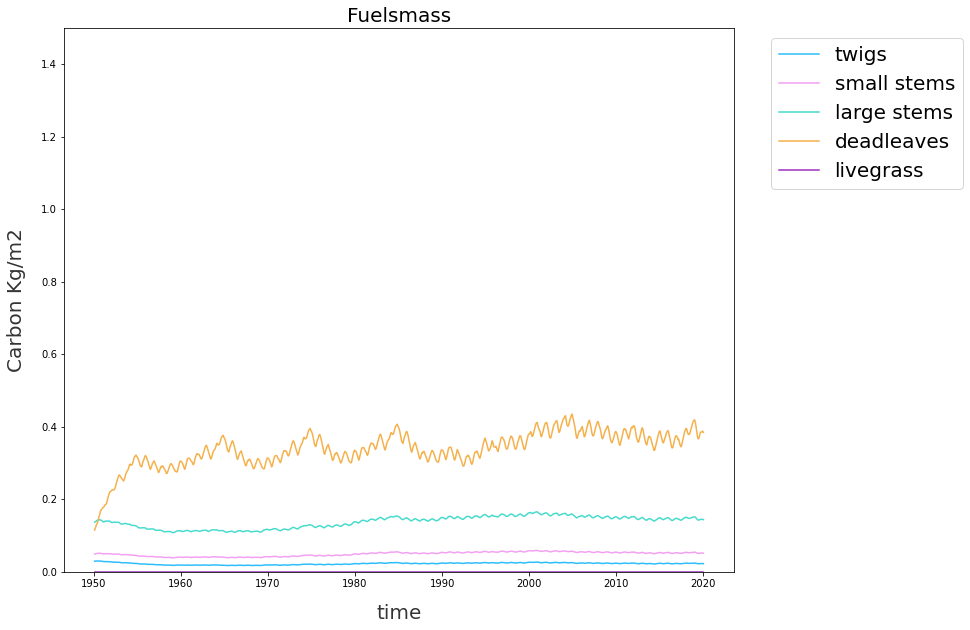

In [82]:
Fuel_Amount=ProcessbyFuelClass(Fates_xr,'FUEL_AMOUNT_BY_NFSC',Time)
def plotterfuel(data,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['FuelClass1'],label="twigs")
    plt.plot(data['FuelClass2'],label="small stems")
    plt.plot(data['FuelClass3'],label="large stems")
    #plt.plot(data['FuelClass4'],label="Trunks")   
    plt.plot(data['FuelClass5'],label="deadleaves")
    plt.plot(data['FuelClass6'],label="livegrass")
    plt.ylim(0,1.5)
    #plt.axhline(y=1.35/2, color='r', linestyle='-',label="live herb")
    #plt.axhline(y=0.475/2, color='r', linestyle='-')
    #plt.axhline(y=0.0625/2, color='r', linestyle='dotted',label="1 hr ")
    #plt.axhline(y=0.25/2, color='r', linestyle='dotted',label="1 hr ")
    #plt.axhline(y=0.1/2, color='r', linestyle='dashdot',label="10 hr")
    
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
plotterfuel(Fuel_Amount,'Fuelsmass','time','Carbon Kg/m2')   


max(Fuel_Amount['FuelClass1'])
max(Fuel_Amount['FuelClass2'])
max(Fuel_Amount['FuelClass3'])
max(Fuel_Amount['FuelClass4'])
max(Fuel_Amount['FuelClass5'])
max(Fuel_Amount['FuelClass6'])

0.029822545126080513

0.059088800102472305

0.1654486358165741

0.245673269033432

0.4351885914802551

0.0

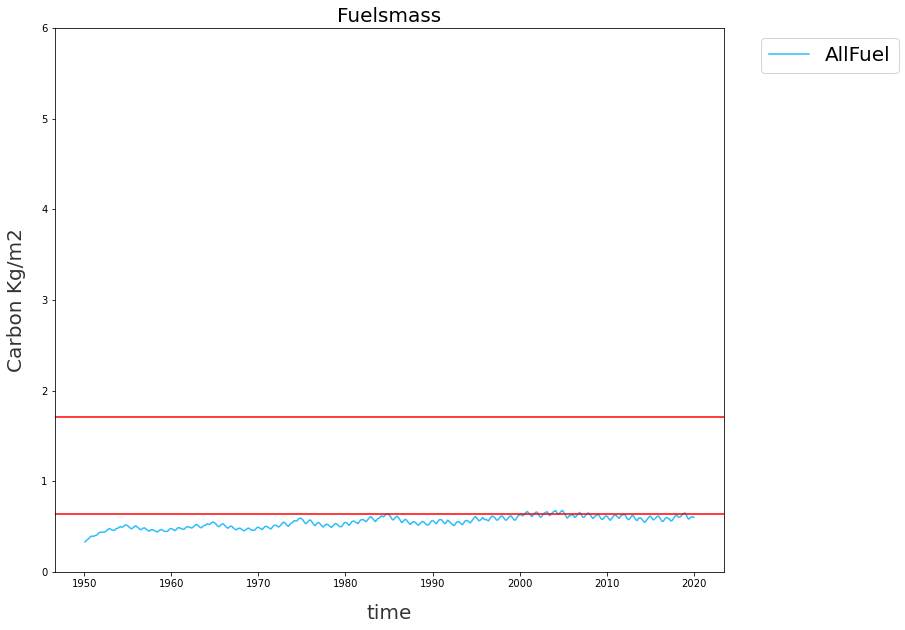

In [83]:
Fuel_Amount=ProcessbyFuelClass(Fates_xr,'FUEL_AMOUNT_BY_NFSC',Time)
def plotterfuel(data,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['FuelClass1']+data['FuelClass2']+data['FuelClass3']+data['FuelClass5']+data['FuelClass6'],label="AllFuel")
    plt.ylim(0,6)
    plt.axhline(y=1.28/2, color='r', linestyle='-')
    plt.axhline(y=3.41/2, color='r', linestyle='-')
    #plt.axhline(y=0.475/2, color='r', linestyle='-')
    #plt.axhline(y=0.0625/2, color='r', linestyle='dotted',label="1 hr ")
    #plt.axhline(y=0.25/2, color='r', linestyle='dotted',label="1 hr ")
    #plt.axhline(y=0.1/2, color='r', linestyle='ashdot',label="10 hr")
    
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
plotterfuel(Fuel_Amount,'Fuelsmass','time','Carbon Kg/m2')   


max(Fuel_Amount['FuelClass1'])
max(Fuel_Amount['FuelClass2'])
max(Fuel_Amount['FuelClass3'])
max(Fuel_Amount['FuelClass4'])
max(Fuel_Amount['FuelClass5'])
max(Fuel_Amount['FuelClass6'])

(0.0, 4.0)

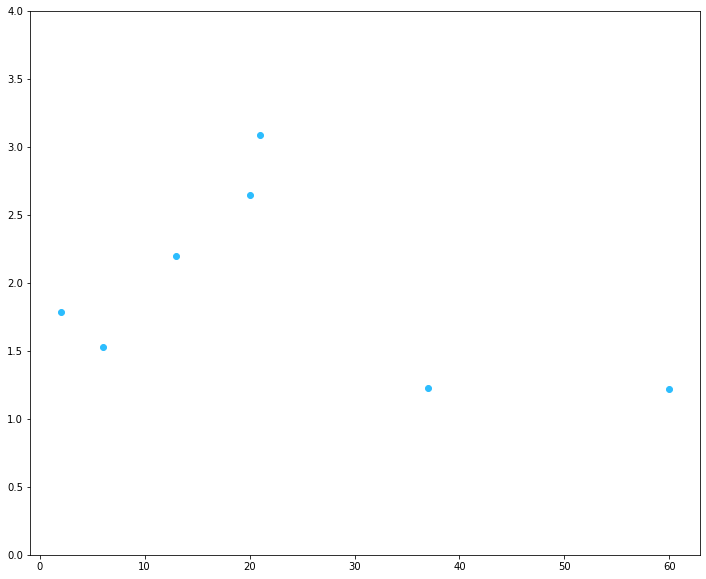

In [84]:
AF_LA=pd.DataFrame({'AGE':[20,21,2,6,13,37,60],'LAI':[2.65,3.09,1.79,1.53,2.20,1.23,1.22]})
plt.scatter(AF_LA['AGE'],AF_LA['LAI'])
plt.ylim(0,4)



(0.0, 4.0)

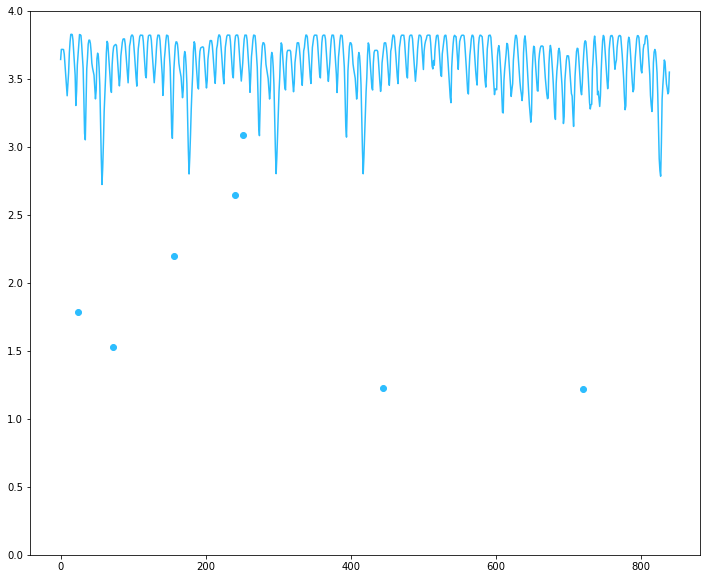

In [85]:
plt.plot(Fates_xr['LAISUN']+Fates_xr['LAISHA'])
plt.scatter(AF_LA['AGE']*12,AF_LA['LAI'])
plt.ylim(0,4)


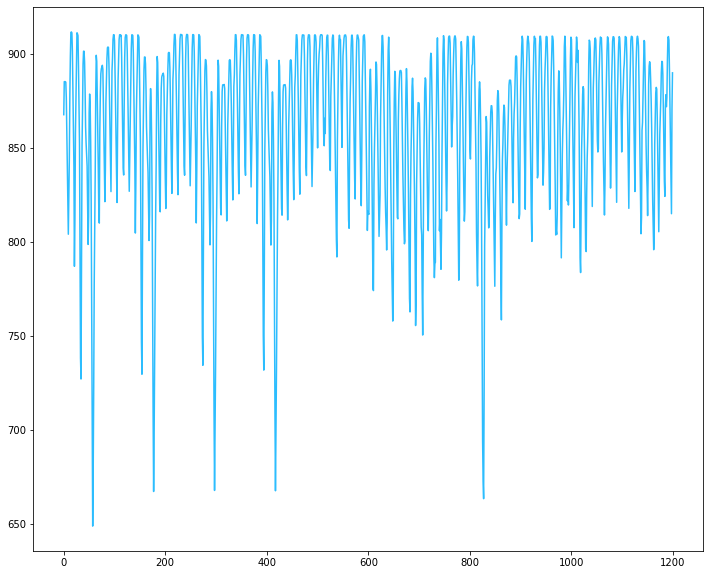

In [34]:
plt.plot(Fates_xr['LEAFC'])

NameError: name 'Biomass' is not defined

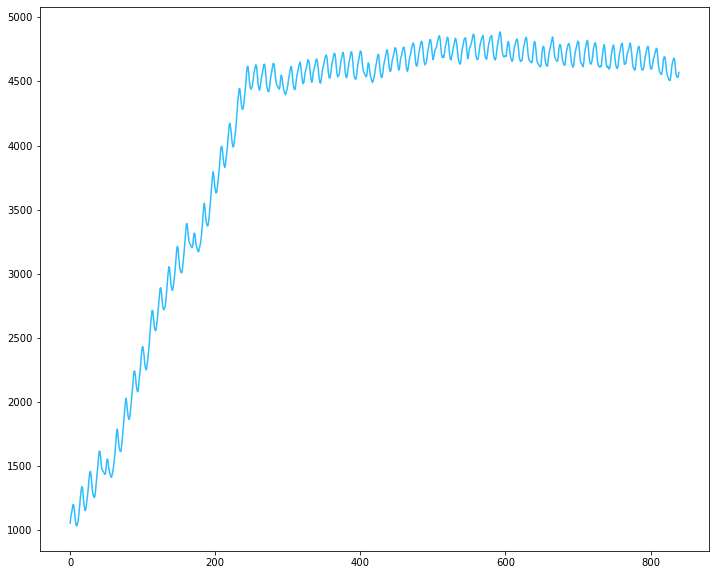

In [86]:
#estimated from Schlensinger and Gill 1978
#https://esajournals.onlinelibrary.wiley.com/doi/epdf/10.2307/1936748
plt.plot(Fates_xr['BIOMASS_CANOPY']+Fates_xr['BIOMASS_UNDERSTORY']*2)
plt.plot(Biomass.Age*12,Biomass.Biomass)

In [127]:
np.array(Fates_xr['PFTleafbiomass'][:,0])*2

array([[173.57465],
       [177.09355],
       [177.09377],
       [177.09413],
       [177.03181],
       [175.40855],
       [171.66231],
       [167.7047 ],
       [163.94681],
       [160.83923],
       [165.0046 ],
       [168.98155],
       [175.80429],
       [179.75807],
       [182.33382],
       [182.39206],
       [182.28998],
       [180.3605 ],
       [176.28014],
       [172.21565],
       [168.05997],
       [157.42361],
       [162.45935],
       [171.60403],
       [175.20393],
       [179.18356],
       [182.2997 ],
       [182.19395],
       [182.00102],
       [178.73586],
       [174.68108],
       [170.51341],
       [159.96529],
       [147.63747],
       [145.41403],
       [158.52339],
       [170.25859],
       [174.13101],
       [178.94908],
       [180.33887],
       [180.33015],
       [179.20723],
       [176.35138],
       [172.28552],
       [170.55008],
       [169.31491],
       [168.08998],
       [163.97495],
       [159.75299],
       [162.76456],


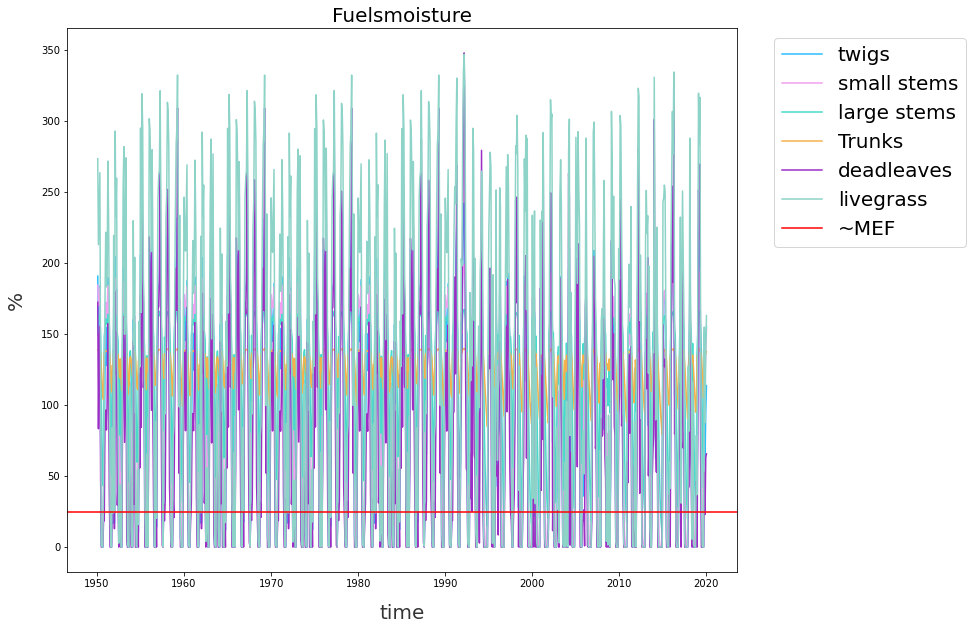

In [87]:
Fuel_Amount=ProcessbyFuelClass(Fates_xr,'FUEL_MOISTURE_NFSC',Time)
def plotterfuel(data,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['FuelClass1']*100,label="twigs")
    plt.plot(data['FuelClass2']*100,label="small stems")
    plt.plot(data['FuelClass3']*100,label="large stems")
    plt.plot(data['FuelClass4']*100,label="Trunks")   
    plt.plot(data['FuelClass5']*100,label="deadleaves")
    plt.plot(data['FuelClass6']*100,label="livegrass") 
    plt.axhline(y=25, color='r', linestyle='-',label="~MEF")
   # plt.axhline(y=0.475/2, color='r', linestyle='-')
   # plt.axhline(y=0.0625/2, color='r', linestyle='dotted',label="1 hr ")
   # plt.axhline(y=0.25/2, color='r', linestyle='dotted',label="1 hr ")
   # plt.axhline(y=0.1/2, color='r', linestyle='dashdot',label="10 hr")
    
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})

plotterfuel(Fuel_Amount,'Fuelsmoisture','time','%')  

In [41]:
var=np.array(Fates_xr['area'])
print(var)
#fig, ax = plt.subplots(figsize=(9, 7))
#plt.title( 'NI', fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
#plt.plot(Time,var)
#2054*.092903

[40592444.]


Text(0.5, 1.0, 'Fire ignitions per year')

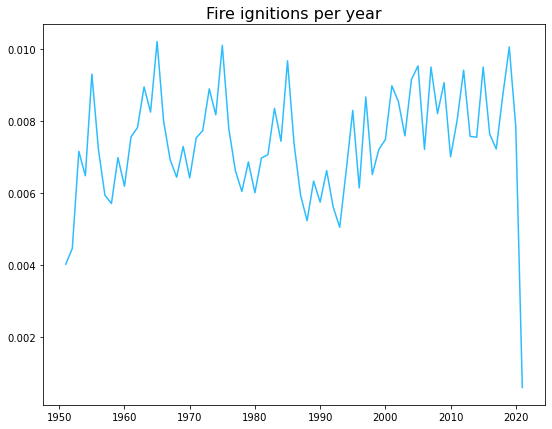

In [102]:

var=np.array(Fates_xr['FIRE_IGNITIONS'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).sum()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fire ignitions per year", fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(var.NI)
#plt.ylim(0,100)

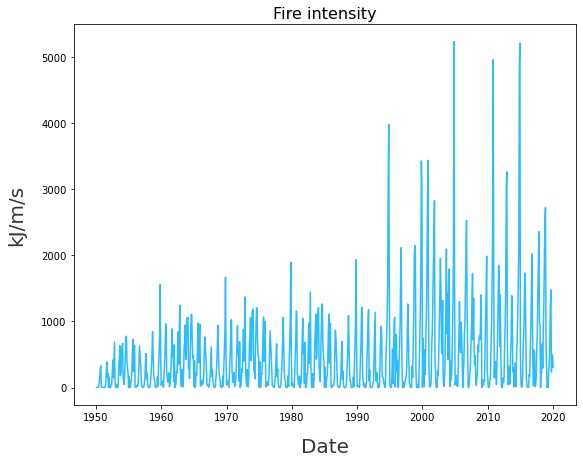

In [105]:
var=np.array(Fates_xr['FIRE_INTENSITY'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fire intensity", fontsize=16)

#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(Time,var)
ax.set_xlabel('Date', labelpad=15, fontsize=20, color="#333533");
ax.set_ylabel('kJ/m/s', labelpad=15, fontsize=20, color="#333533");

Text(0.5, 1.0, 'Fuel Bulkdensity kg biomass/m3')

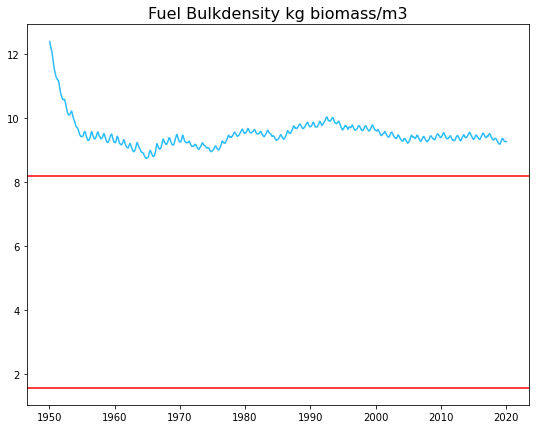

In [90]:
var=np.array(Fates_xr['FIRE_FUEL_BULKD'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fuel Bulkdensity kg biomass/m3", fontsize=16)
plt.axhline(y=1.58, color='r', linestyle='-')
plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(Time,var)

Text(0.5, 1.0, 'Fuel surface area volume cm-1')

(0.0, 150.0)

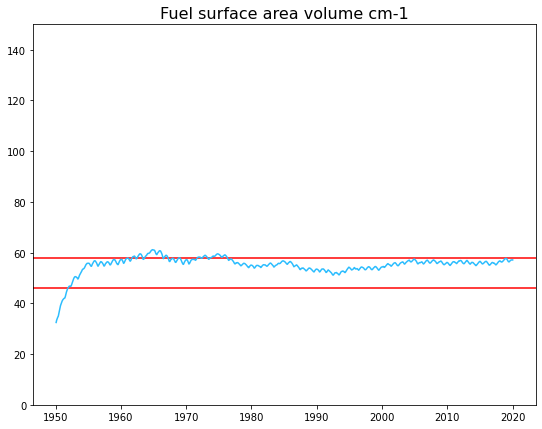

In [91]:
var=np.array(Fates_xr[ 'FIRE_FUEL_SAV'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fuel surface area volume cm-1", fontsize=16)
#plt.axhline(y=108.6, color='r', linestyle='-')
plt.axhline(y=58, color='r', linestyle='-')
plt.axhline(y=46, color='r', linestyle='-')
plt.plot(Time,var)
plt.ylim(0,150)
### Note most SAV values in in cm -1 not m-1

Text(0.5, 1.0, 'Extinction moisture content')

(0.0, 0.325)

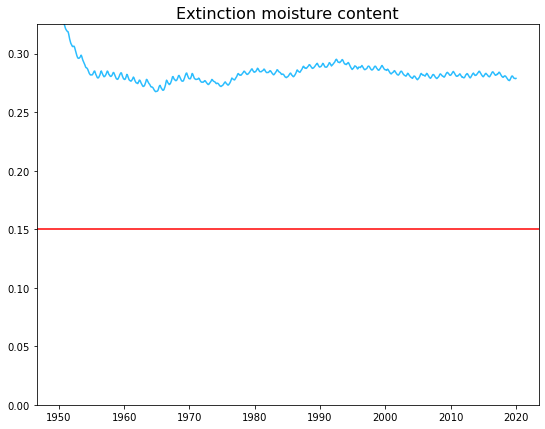

In [92]:

var=np.array(Fates_xr['FIRE_FUEL_MEF'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Extinction moisture content", fontsize=16)#
plt.axhline(y=0.15, color='r', linestyle='-')
plt.ylim(0,0.325)
plt.plot(Time,var)

Text(0.5, 1.0, 'Nesterov index')

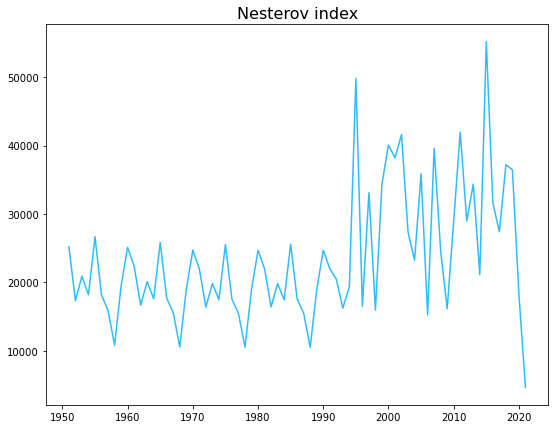

In [93]:
var=np.array(Fates_xr['FIRE_NESTEROV_INDEX'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).mean()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Nesterov index", fontsize=16)
plt.plot(var.NI)

Text(0.5, 1.0, 'Nesterov index')

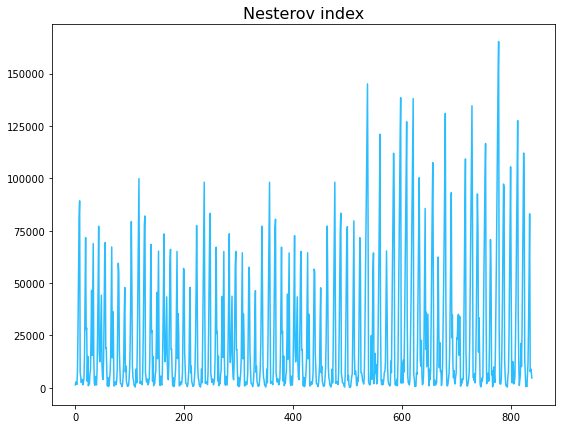

In [94]:
var=np.array(Fates_xr['FIRE_NESTEROV_INDEX'])
#var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).mean()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Nesterov index", fontsize=16)
plt.plot(var)

Text(0.5, 1.0, ' (kJ/m/s)')

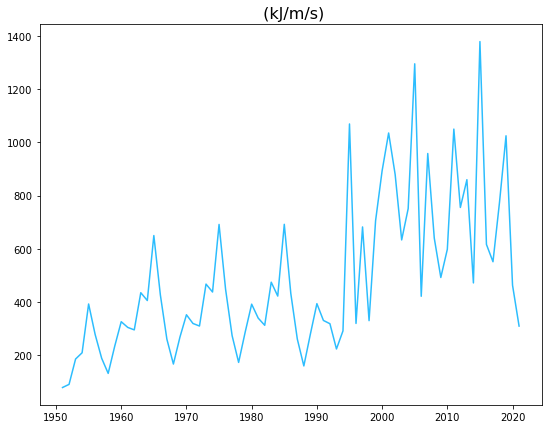

In [95]:
var=np.array(Fates_xr['FIRE_INTENSITY'])

var=pd.DataFrame({'Ignitions':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).mean()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title(" (kJ/m/s)", fontsize=16)
plt.plot(var.Ignitions)

Text(0.5, 1.0, 'FIRE_AREA')

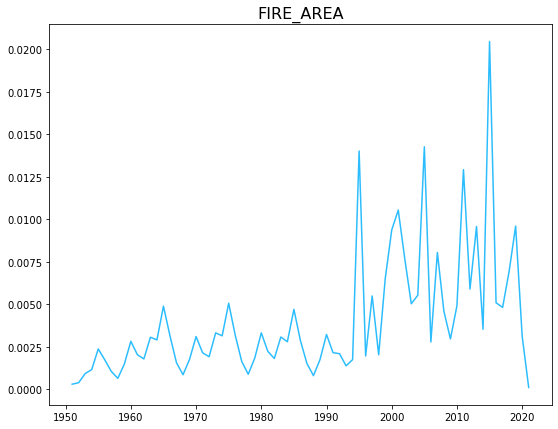

In [104]:
var=np.array(Fates_xr['FIRE_AREA'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).sum()

fig, ax = plt.subplots(figsize=(9, 7))
plt.title('FIRE_AREA', fontsize=16)
plt.plot(var)

Text(0.5, 1.0, 'Intensity')

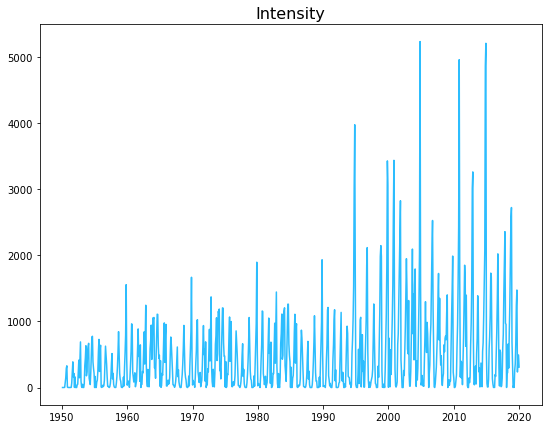

In [97]:
var=np.array(Fates_xr['FIRE_INTENSITY'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title('Intensity', fontsize=16)
plt.plot(Time,var)

Text(0.5, 1.0, 'Aboveground biomass')

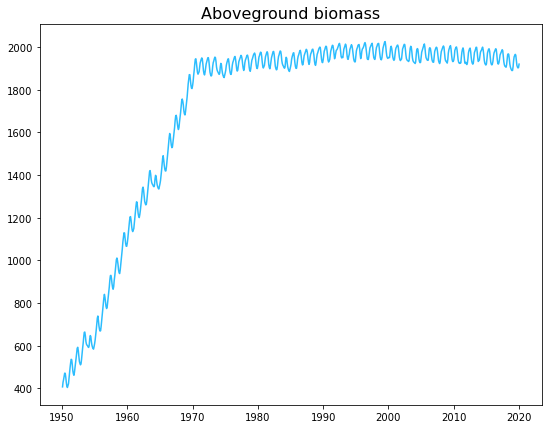

In [98]:
var=np.array(Fates_xr['AGB'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title('Aboveground biomass', fontsize=16)
plt.plot(Time,var)

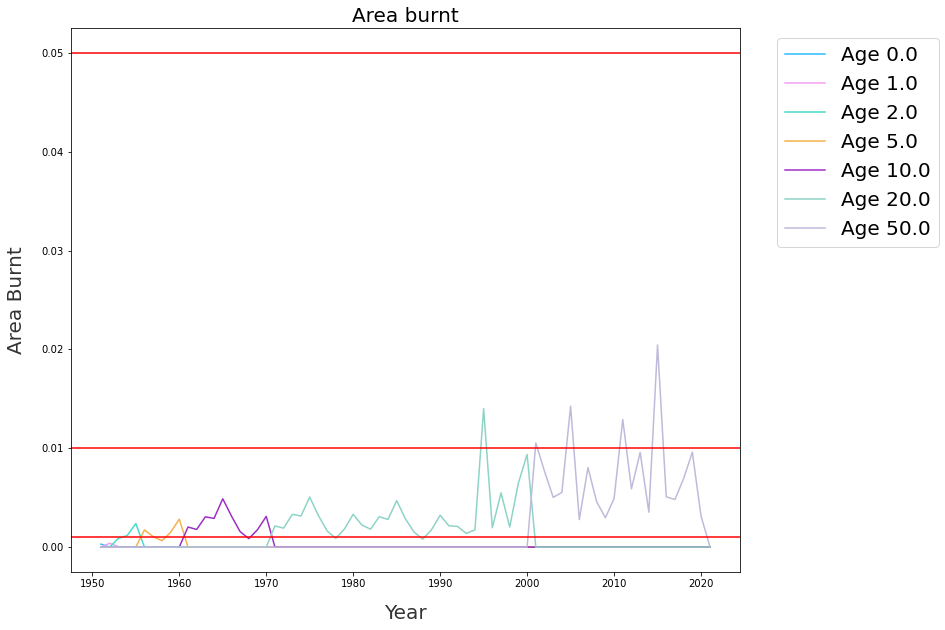

In [99]:
checkout=ProcessbyPAge(Fates_xr,'AREA_BURNT_BY_PATCH_AGE',Time)
checkout=checkout.groupby(pd.Grouper(freq="y")).sum()
plotterage(checkout,"Area burnt","Year","Area Burnt",'lower right')      
plt.axhline(y=.05, color='r', linestyle='-')
plt.axhline(y=.001, color='r', linestyle='-')
plt.axhline(y=.01, color='r', linestyle='-')

In [100]:
LeafBiobyPFt=ProcesbyPFT(Fates_xr,'PFTleafbiomass',Time,["chaparral","grass"])
plotterpft(LeafBiobyPFt,["chaparral","grass"],"LeafBiomass","Time","Biomass")

IndexError: index 1 is out of bounds for axis 0 with size 1